In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\Users\aliyi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aliyi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aliyi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\aliyi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\aliyi\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv("kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## EDA

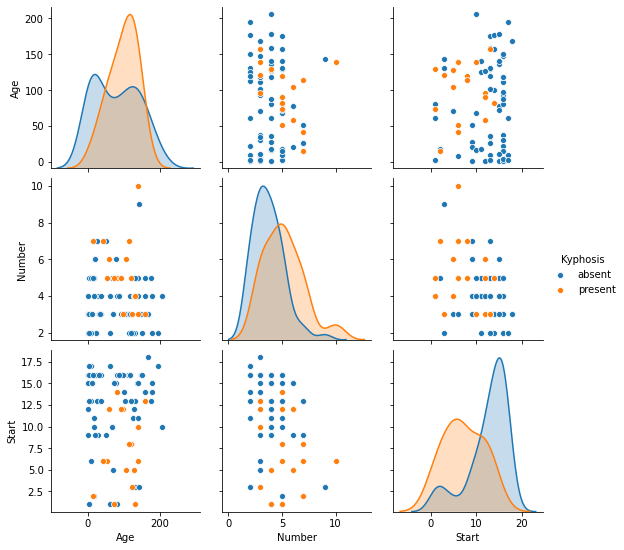

In [4]:
sns.pairplot(df, hue="Kyphosis")

## Pre-Processing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop("Kyphosis", axis=1)
y = df["Kyphosis"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
X_train.head()

,Age,Number,Start
62,81,4,1
42,143,9,3
54,140,4,15
16,78,6,15
39,91,5,12


In [9]:
y_train.head()

62     absent
42     absent
54     absent
16     absent
39    present
Name: Kyphosis, dtype: object

## Decision Trees

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Prediction Evaluation

In [13]:
y_pred = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15,  4],
       [ 4,  2]], dtype=int64)

Text(0.5, 15.0, 'Predicted Label')

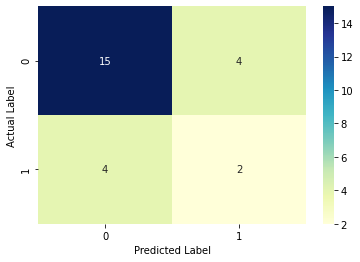

In [16]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.79      0.79      0.79        19
     present       0.33      0.33      0.33         6

    accuracy                           0.68        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.68      0.68      0.68        25



In [18]:
y.value_counts()  # unbalanced data

absent     64
present    17
Name: Kyphosis, dtype: int64

In [19]:
features = list(df.columns[1:])
targets = ["absent", "present"]
print(features)
print(targets)

['Age', 'Number', 'Start']
['absent', 'present']


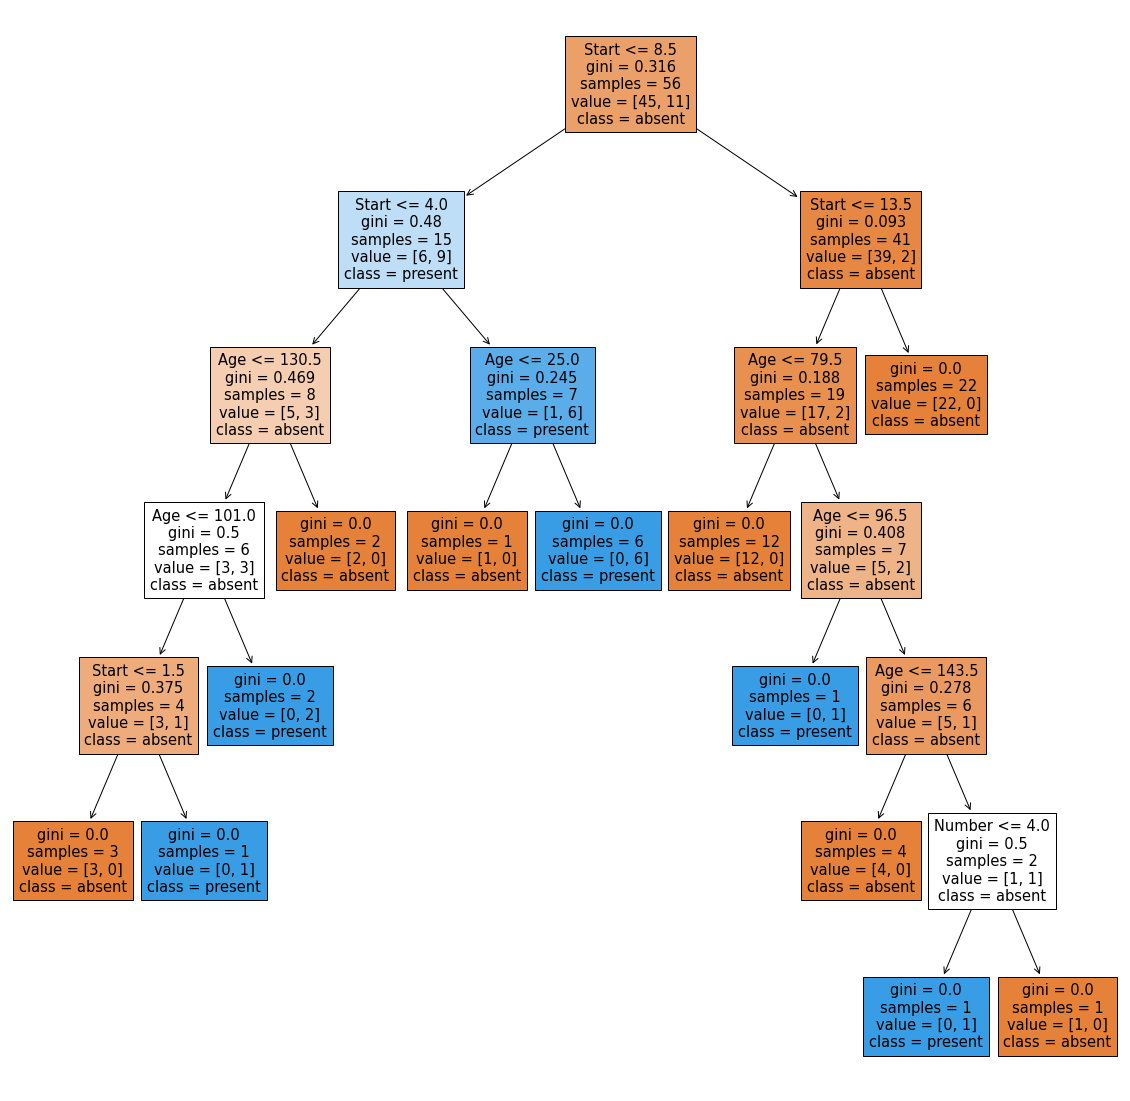

In [20]:
from sklearn import tree
plt.figure(figsize=(20,20))
# plt.style.use('dark_background')  # darkmode graph
# plt.style.use()
tree2 = tree.plot_tree(dtree, filled=True, feature_names=features, class_names=targets)

## Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier(n_estimators=100)

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [27]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[19,  0],
       [ 5,  1]], dtype=int64)

Text(0.5, 15.0, 'Predicted Label')

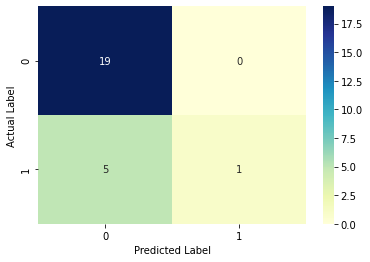

In [28]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



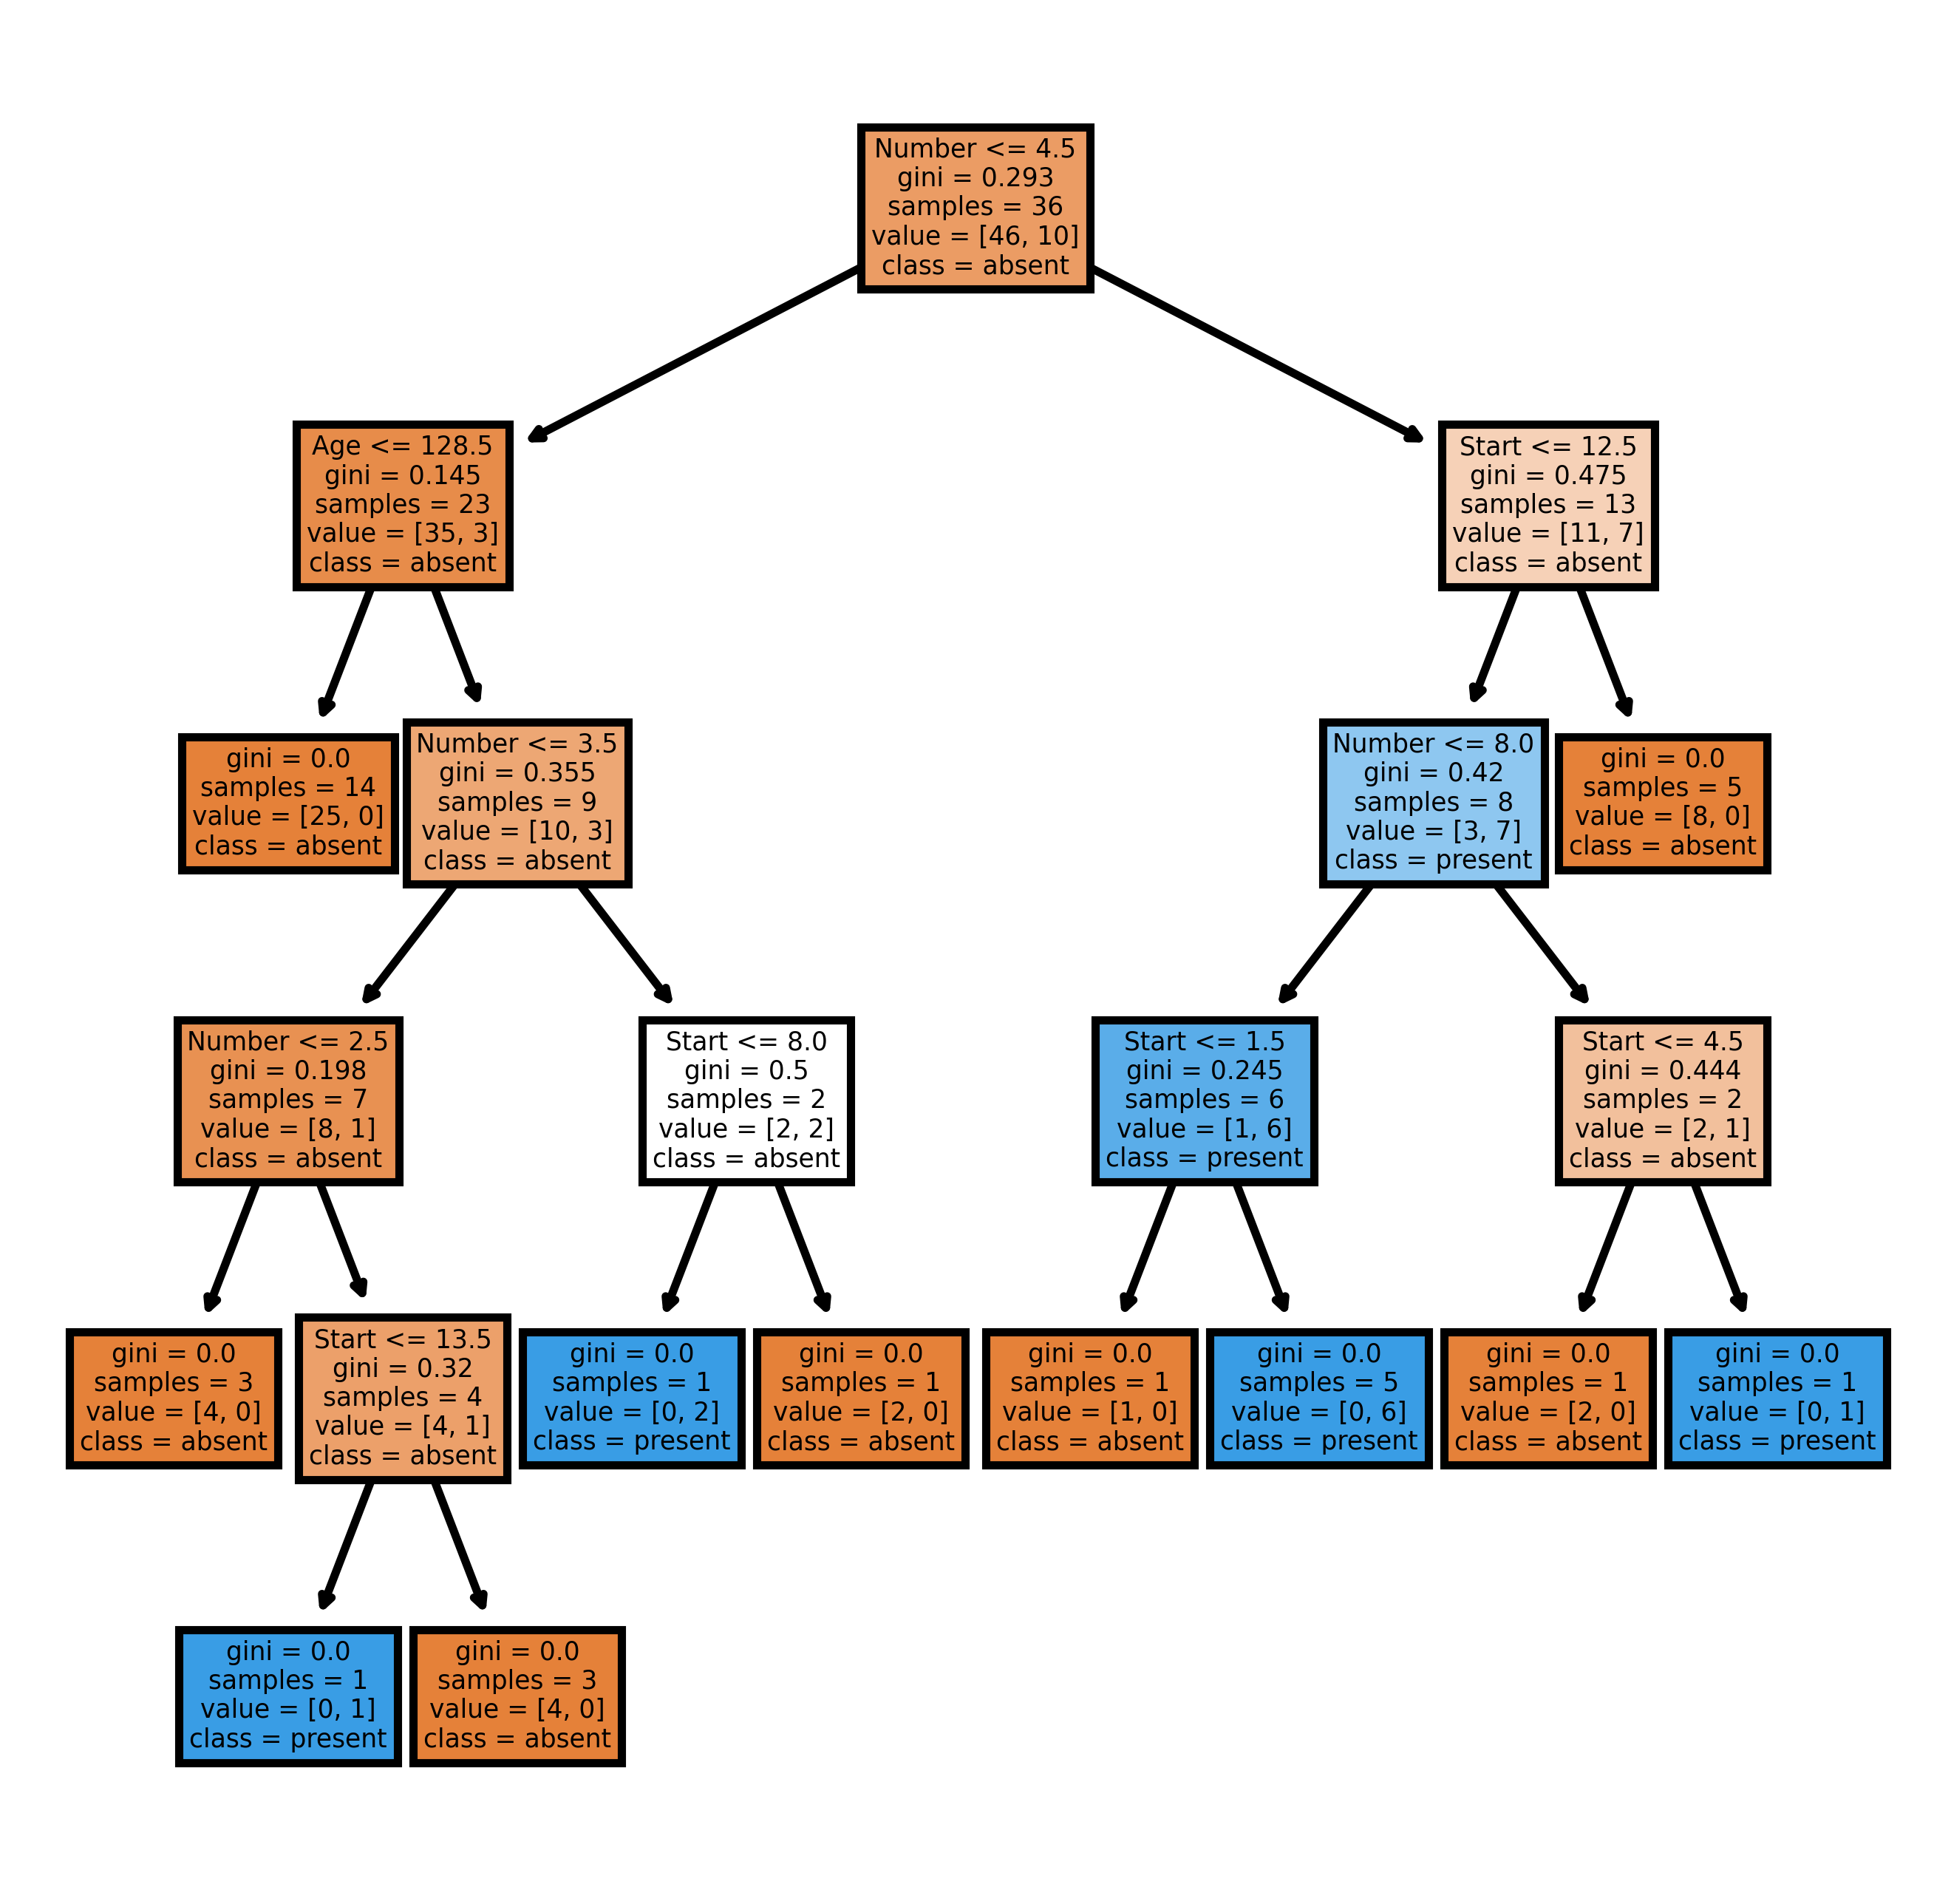

In [31]:
fn=features
cn=targets
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('rf.png')